In [12]:
import numpy as np 
import pandas as pd 
import scipy.stats as stats  
import matplotlib.pyplot as plt
import sklearn 
from sklearn.datasets import load_boston 
import pickle
import seaborn as sns 
% matplotlib inline

boston = load_boston() 
 
bos = pd.DataFrame(boston.data) 

In [223]:
#Linear Regression is a High bias/low variance model. Even after repeated sampling, the best fit line will stay
#roughly in the same position (low variance), but the average of the models created after 
#repeated sampling won't do a great job in capturing the perfect relationship (high bias).
#Low variance is helpful when we don't have less training data!

In [17]:
bos.columns=boston.feature_names

In [ ]:
#Build the linear regression model to predict 'Price' based on other dependent variable. 

In [2]:
bos.shape

(506, 13)

In [16]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [241]:
#print(boston.DESCR)##to get the data description

In [242]:
#bos.info()# printing the summary of the dataframe

In [189]:
#bos.isna().sum() # finding the count of missing values from different columns

In [18]:
bos.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [19]:
correlation_matrix = bos.corr().round(2)

In [20]:
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.00,-0.20,0.40,-0.06,0.42,-0.22,0.35,-0.38,0.62,0.58,0.29,-0.38,0.45
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41
INDUS,0.40,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50
RAD,0.62,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54


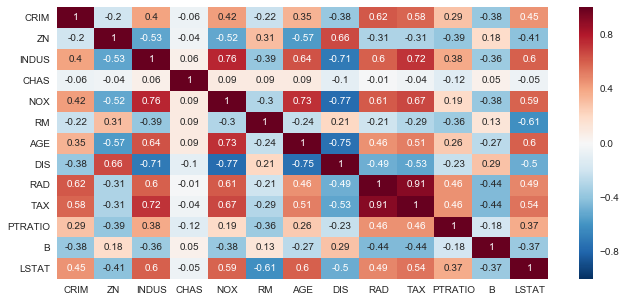

In [134]:
plt.figure(figsize=(11,5))
sns.heatmap(data=correlation_matrix, annot=True)# annot = True to print the values inside the square

In [ ]:
bos['Price']=boston.target

In [167]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

vif

,VIF,Features
0,1.464017,CRIM
1,2.154281,ZN
2,3.179208,INDUS
3,1.057769,CHAS
4,3.899474,NOX
5,1.871901,RM
6,3.075463,AGE
7,3.955044,DIS
8,1.494944,PTRATIO
9,1.312273,B


In [135]:
Y = bos['Price']
X= bos.drop(['Price','RAD','TAX'],axis=1)

In [137]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO',
       'B', 'LSTAT'],
      dtype='object')

In [145]:
from sklearn.preprocessing import StandardScaler 
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[-0.41771335  0.28482986 -1.2879095  ..., -1.45900038  0.44105193
  -1.0755623 ]
 [-0.41526932 -0.48772236 -0.59338101 ..., -0.30309415  0.44105193
  -0.49243937]
 [-0.41527165 -0.48772236 -0.59338101 ..., -0.30309415  0.39642699
  -1.2087274 ]
 ..., 
 [-0.41137448 -0.48772236  0.11573841 ...,  1.17646583  0.44105193
  -0.98304761]
 [-0.40568883 -0.48772236  0.11573841 ...,  1.17646583  0.4032249
  -0.86530163]
 [-0.41292893 -0.48772236  0.11573841 ...,  1.17646583  0.44105193
  -0.66905833]]


In [192]:
#bos.head()

In [146]:
from sklearn.model_selection import train_test_split

In [193]:
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y,test_size=0.33,random_state=100)

In [204]:
X_train.shape
#X_test.shape
#Y_train.shape
#Y_test.shape
X_test[0]

array([-0.41406187,  2.94584308, -1.40317788, -0.27259857, -1.30175366,
        1.4095083 , -1.0765928 ,  1.67042686, -2.70737911,  0.38951945,
       -0.8456773 ])

In [149]:
from sklearn.linear_model import LinearRegression

In [150]:
lm= LinearRegression()

In [196]:
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [197]:
# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

22.4067972636
[-0.32529589  0.71448445 -0.65712574  0.80727268 -1.47181201  2.89779969
 -0.5409797  -3.1686897  -1.87418776  0.94490299 -3.01528615]


In [198]:
Y_pred = lm.predict(X_test)

In [256]:
Y_pred[:6]

array([ 34.63016569,  30.63804591,  22.82075411,  18.2072855 ,
        20.37222835,  26.25515423])

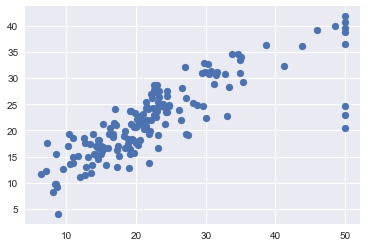

In [199]:
plt.scatter(Y_test,Y_pred)

In [258]:
Y_test[:6] - Y_pred[:6]

198   -0.030166
229    0.861954
502   -2.220754
31    -3.707286
315   -4.172228
169   -3.955154
Name: Price, dtype: float64

In [243]:
# # saving the model to the local file system
# filename = 'lr_model1.pickle'
# pickle.dump(lm, open(filename, 'wb'))

# # prediction using the saved model.
# loaded_model = pickle.load(open(filename, 'rb'))
# prediction=loaded_model.predict(([[-0.41406187,2.94584308,-1.40317788,-0.27259857,-1.30175366,1.4095083 ,-1.0765928 ,1.67042686,-2.70737911,0.38951945,-0.8456773]]))
# print(prediction[0])

34.630165678


In [233]:
print(lm.coef_) 

#The coefficients are estimated using the least-squares criterion,
#i.e., the best fit line has to be calculated that minimizes the sum of squared residuals (or "sum of squared errors")

[-0.32529589  0.71448445 -0.65712574  0.80727268 -1.47181201  2.89779969
 -0.5409797  -3.1686897  -1.87418776  0.94490299 -3.01528615]


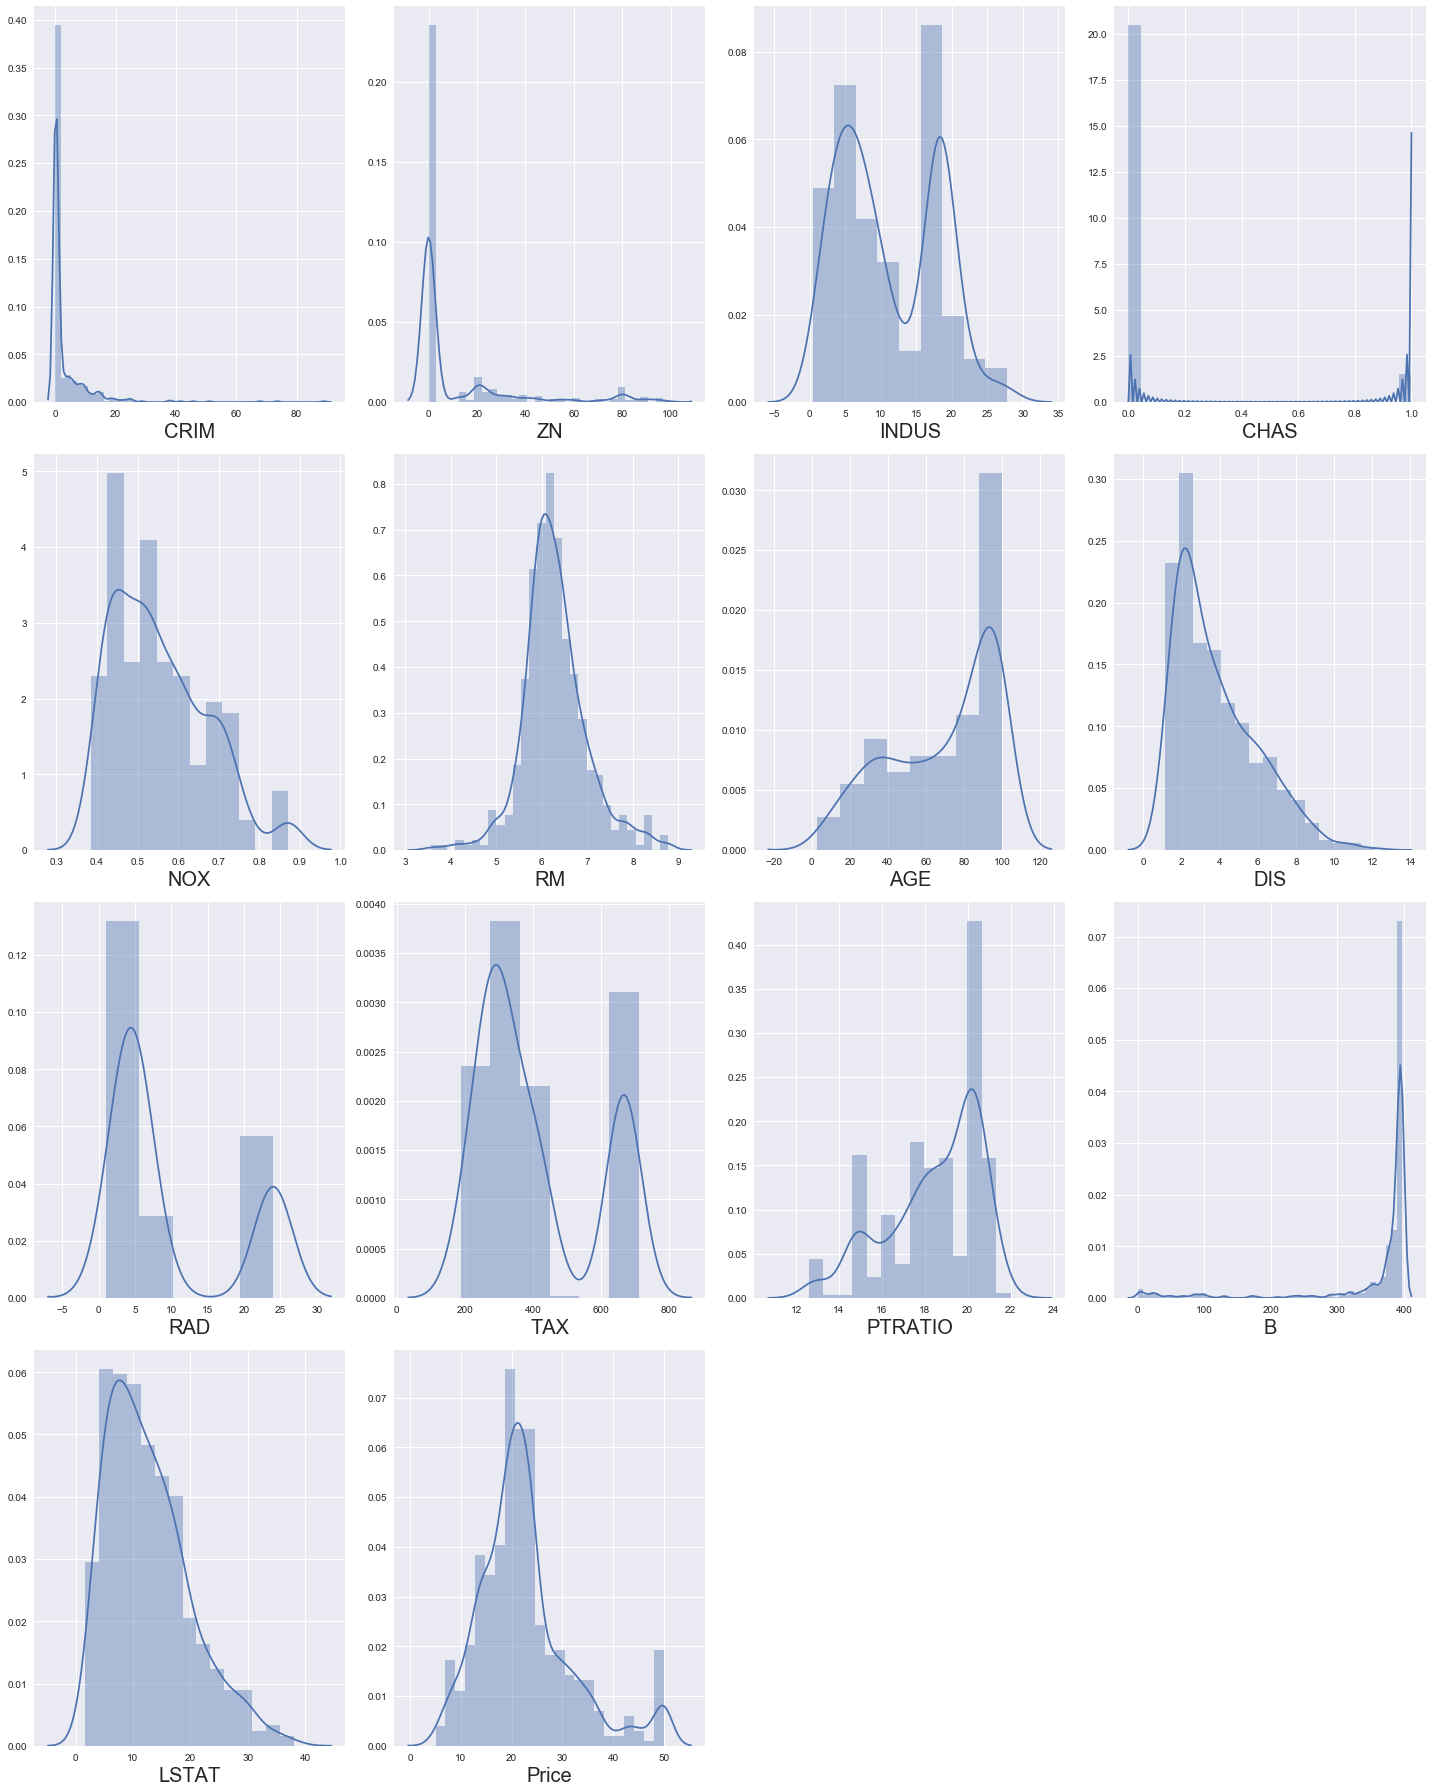

In [235]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in bos:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(bos[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

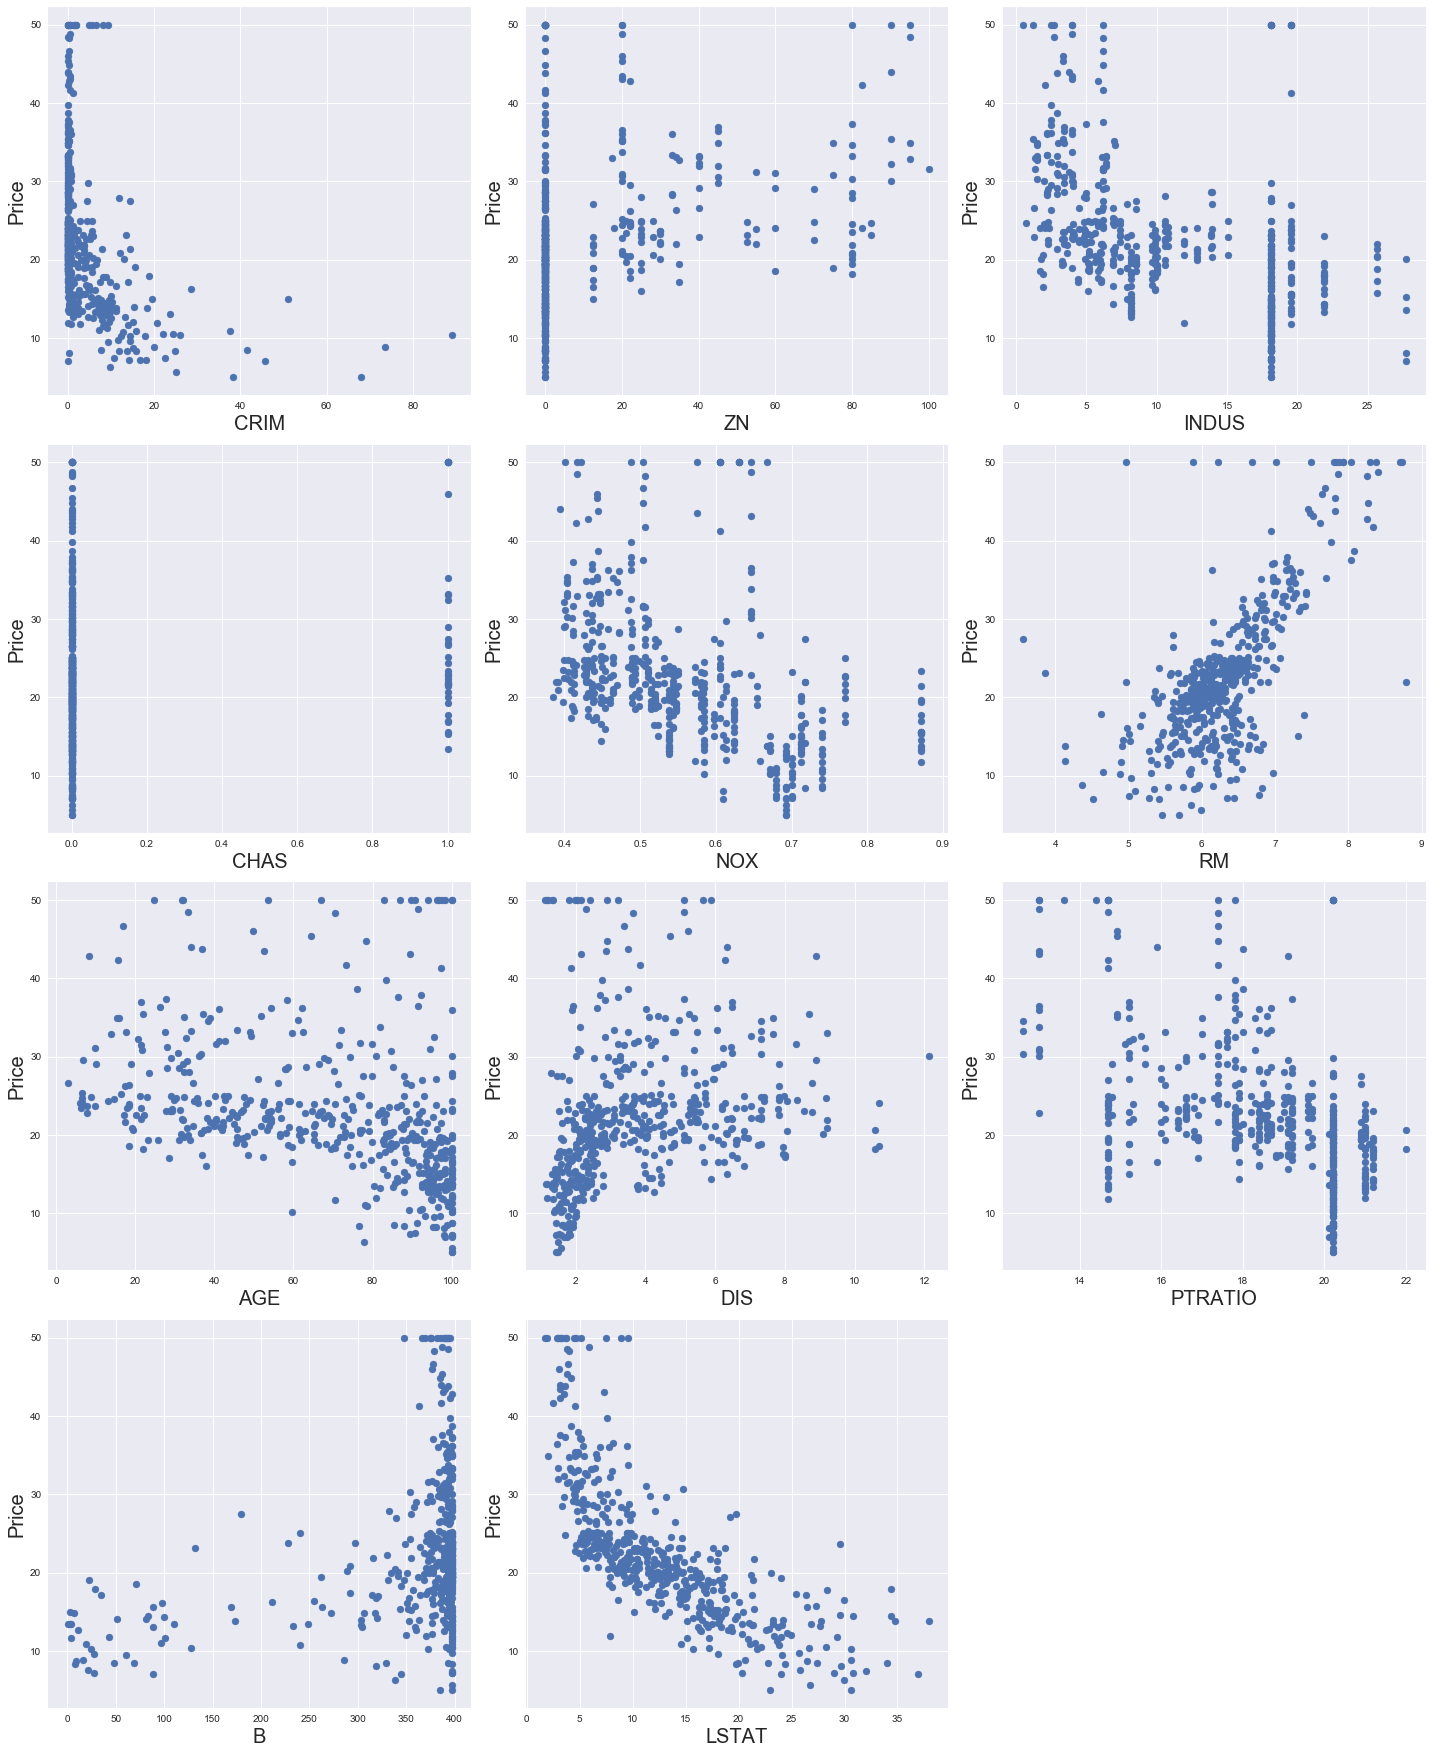

In [234]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],Y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [102]:
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV

In [207]:
# Let's create a function to create adjusted R-Squared
# with the addition of new features in our model, it is not necessary that our model will yield 
# better results but R2 value will increase. To rectify this problem, we use Adjusted R2 value which 
# penalises excessive use of such features which do not correlate with the output data
def adj_r2(X,Y):
    r2 = lm.score(X,Y)
    n = X.shape[0]
    p = X.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [260]:
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)

print(mse)

30.2330343089


In [246]:
lm.score(X_train,Y_train)#R2 Score

0.7490671093393676

In [240]:
adj_r2(X_train,Y_train)

0.74062594176362762

In [239]:
lm.score(X_test,Y_test)#So it looks like our model r2 score is less on the test data.

0.68377322438617583

In [209]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(X_train, Y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=100000, n_alphas=100, n_jobs=1, normalize=True,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [210]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.002042315160964963

In [211]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train, Y_train)

Lasso(alpha=0.002042315160964963, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [212]:
lasso_reg.score(X_test, Y_test)
#our r2_score for test data comes same as before using regularization. So, it is fair to say
#our OLS model did not overfit the data.

0.68377217341035912

In [176]:
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(X_train, Y_train)

RidgeCV(alphas=array([ 3.43482,  5.36563,  2.98557,  1.55237,  0.01812,  3.58396,
        5.17655,  7.6168 ,  9.61031,  2.31003,  0.47285,  3.29782,
        3.1171 ,  1.24785,  2.19336,  3.94145,  8.84435,  0.08383,
        8.29389,  5.846  ,  3.19589,  2.08373,  5.59362,  0.1793 ,
        3.1618 ,  3.12521...6371,
        0.7707 ,  8.85343,  3.72805,  0.70115,  2.74951,  6.36083,
        1.03491,  3.7283 ]),
    cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
    store_cv_values=False)

In [213]:
ridgecv.alpha_

0.1793010758940905

In [214]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train, Y_train)

Ridge(alpha=0.1793010758940905, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [215]:
ridge_model.score(X_test, Y_test)

#we got the same r2 square using Ridge regression as well. So, it's safe to say there is no overfitting.

0.68373394232208906

In [216]:
# Elastic net
elasticCV = ElasticNetCV(alphas = None, cv =10)
elasticCV.fit(X_train, Y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [217]:
elasticCV.alpha_

0.063149340433417162

In [218]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
elasticCV.l1_ratio

0.5

In [219]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(X_train, Y_train)

ElasticNet(alpha=0.063149340433417162, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

In [220]:
elasticnet_reg.score(X_test, Y_test)
#So, we can see by using different type of regularization, we still are getting the same r2 score. 
#That means our OLS model has been well trained over the training data and there is no overfitting.

0.68018498966324736